## Problem Statement 4:
 The ‘seeds.csv’ dataset contains the data about the wheat seeds, the
‘Type’ column consisit of three unique values, 1, 2, 3, which are classified based on the
charecterstics of seeds entailing in other columns.
Load the ‘seeds.csv’ dataset into a DataFrame and perform the following tasks:

1. Considering the 'Type' column as target, analyze the target column by printing the unique values

2. Separate the feature vectors and the target variable

3. Split the dataset into train and test sets in a 70:30 ratio

4. Build a Decision Tree Classifier and a GaussianNB model and print their accuracy scores

5. For the Decision Tree Classifier and a GaussianNB models boost the accuracy using ADA
Boost Classifier and compare the accuracy scores with original models using a bar plot


In [924]:
import pandas as pd
import numpy as np
from scipy import integrate
import seaborn as sns
import matplotlib.pyplot as mp
import plotly.offline as pyo
import plotly.graph_objs as go;
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')


In [925]:
data=pd.read_csv("D:\Shivam\study material\CSV\seeds.csv")
data

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [926]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             199 non-null    float64
 1   Perimeter        199 non-null    float64
 2   Compactness      199 non-null    float64
 3   Kernel.Length    199 non-null    float64
 4   Kernel.Width     199 non-null    float64
 5   Asymmetry.Coeff  199 non-null    float64
 6   Kernel.Groove    199 non-null    float64
 7   Type             199 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


In [927]:
data.describe(include='all')

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,14.918744,14.595829,0.870811,5.643151,3.265533,3.699217,5.420653,1.994975
std,2.919976,1.310445,0.023320,0.443593,0.378322,1.471102,0.492718,0.813382
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.330000,13.470000,0.857100,5.267000,2.954500,2.570000,5.046000,1.000000
50%,14.430000,14.370000,0.873400,5.541000,3.245000,3.631000,5.228000,2.000000
75%,17.455000,15.805000,0.886800,6.002000,3.564500,4.799000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


### 1. Considering the 'Type' column as target, analyze the target column by printing the
unique values

In [928]:
data['Type'].value_counts()

2    68
1    66
3    65
Name: Type, dtype: int64

Having three unique values

### 2. Separate the feature vectors and the target variable

In [929]:
X=data.drop('Type',axis=1)

In [930]:
Y=data['Type']

### 3. Split the dataset into train and test sets in a 70:30 ratio

In [931]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,random_state=40,test_size=0.3)

### 4. Build a Decision Tree Classifier and a GaussianNB model and print their accuracy scores


In [932]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score


In [933]:
def Select_model(modeltype,X, y=0):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    
    Adaboostclass = AdaBoostClassifier(base_estimator=modeltype,
    n_estimators=50,
    learning_rate=0.07,
    random_state=1)
    Adaboostclass.fit(X_train, y_train)
    Adaboostclasspred_labels = Adaboostclass.predict(X_test)

    model = modeltype
    model.fit(X_train, y_train)
    pred_labels = model.predict(X_test)
    print("Model ::",modeltype,'\n')  
    print('Accuracy Score without boosting: ', accuracy_score(y_test, pred_labels),"\n")
    print('Accuracy Score using Ada boost boosting: ', accuracy_score(y_test, Adaboostclasspred_labels),"\n")
    
    data2=[]
    result=[]
    data2.append(str(modeltype))
    data2.append(str('AdaBoostClassifier'))
    result.append(accuracy_score(y_test, pred_labels))
    result.append(accuracy_score(y_test, Adaboostclasspred_labels))

    fig = mp.figure(figsize=(7,4))
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    mp.bar(x=data2,height=result,color='green')
    mp.show()
    return  ;

### 5. For the Decision Tree Classifier and a GaussianNB models boost the accuracy using ADA
Boost Classifier and compare the accuracy scores with original models using a bar plot

Model :: DecisionTreeClassifier() 

Accuracy Score without boosting:  0.8833333333333333 

Accuracy Score using Ada boost boosting:  0.8666666666666667 



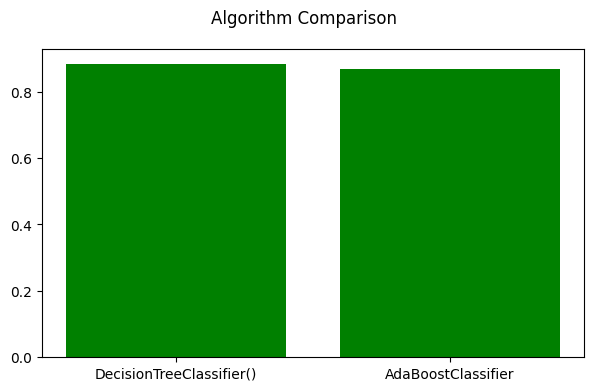

In [934]:
Select_model(DecisionTreeClassifier(),X,Y)

Model :: GaussianNB() 

Accuracy Score without boosting:  0.8666666666666667 

Accuracy Score using Ada boost boosting:  0.8833333333333333 



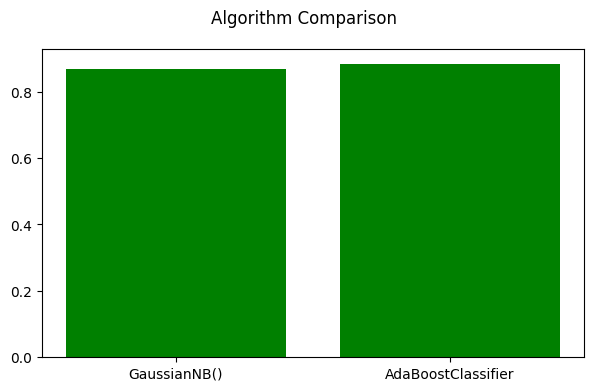

In [935]:
model_naive_bayes=GaussianNB()
Select_model(model_naive_bayes,X,Y)

### GITHUB Link :https://github.com/Shanezatch/Learnerhub/blob/1dac4496cb5e126bbf9be759ccafe20398393a63/IPYTHON/Assignment%206.question%204.ipynb